In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset inot a DataFrame

In [5]:
weather_data=pd.read_csv("weather.csv")

In [6]:
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


### Checking for missing values

In [7]:
missing_values = weather_data.isnull().sum()

In [8]:
missing_values

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

### Converting categorical data to appropriate types

In [9]:
# Convert categorical data to appropriate types
weather_data['WindGustDir'] = weather_data['WindGustDir'].astype('category')
weather_data['WindDir9am'] = weather_data['WindDir9am'].astype('category')
weather_data['WindDir3pm'] = weather_data['WindDir3pm'].astype('category')
weather_data['RainToday'] = weather_data['RainToday'].astype('category')
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].astype('category')

### Data Exploration

In [10]:
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


### Filling the missing numerical values with the median 

In [11]:
for column in weather_data.select_dtypes(include=['float64', 'int64']).columns:
    weather_data[column] = weather_data[column].fillna(weather_data[column].median())

### Filling missing categorical values with the mode

In [12]:
for column in weather_data.select_dtypes(include=['category']).columns:
    weather_data[column] = weather_data[column].fillna(weather_data[column].mode()[0])

### Verifying that there are no more missing values

In [13]:
missing_values_after_cleaning = weather_data.isnull().sum()
print("Missing Values After Cleaning:\n", missing_values_after_cleaning)

Missing Values After Cleaning:
 MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


# Exploratory Data Analysis

### Statistical Summary

In [14]:
weather_data.describe(include='all')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,366.000000,366.000000,366.000000,366.000000,366.000000,366,366.000000,366,366,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366,366.000000,366
unique,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NW,NaN,SE,NW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,76,NaN,78,62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300,NaN,300
mean,7.265574,20.550273,1.428415,4.521858,7.915027,NaN,39.836066,NaN,NaN,9.601093,...,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,NaN,1.428415,NaN
std,6.025800,6.690516,4.225800,2.669383,3.467741,NaN,13.024126,NaN,NaN,7.883703,...,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,NaN,4.225800,NaN
min,-5.300000,7.600000,0.000000,0.200000,0.000000,NaN,13.000000,NaN,NaN,0.000000,...,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,NaN,0.000000,NaN
25%,2.300000,15.025000,0.000000,2.200000,6.000000,NaN,31.000000,NaN,NaN,6.000000,...,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,NaN,0.000000,NaN
50%,7.450000,19.650000,0.000000,4.200000,8.600000,NaN,39.000000,NaN,NaN,7.000000,...,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,NaN,0.000000,NaN
75%,12.500000,25.500000,0.200000,6.400000,10.500000,NaN,46.000000,NaN,NaN,13.000000,...,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,NaN,0.200000,NaN


### Temperature Trends

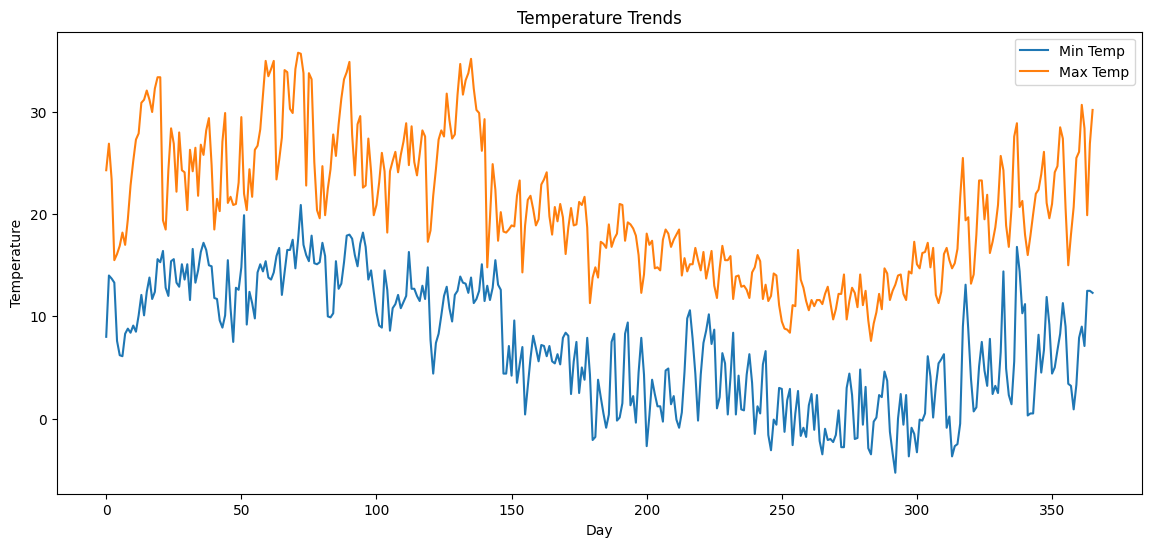

In [15]:
plt.figure(figsize=(14, 6))
plt.plot(weather_data['MinTemp'], label='Min Temp')
plt.plot(weather_data['MaxTemp'], label='Max Temp')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Temperature Trends')
plt.legend()
plt.show()

### Rainfall Patterns

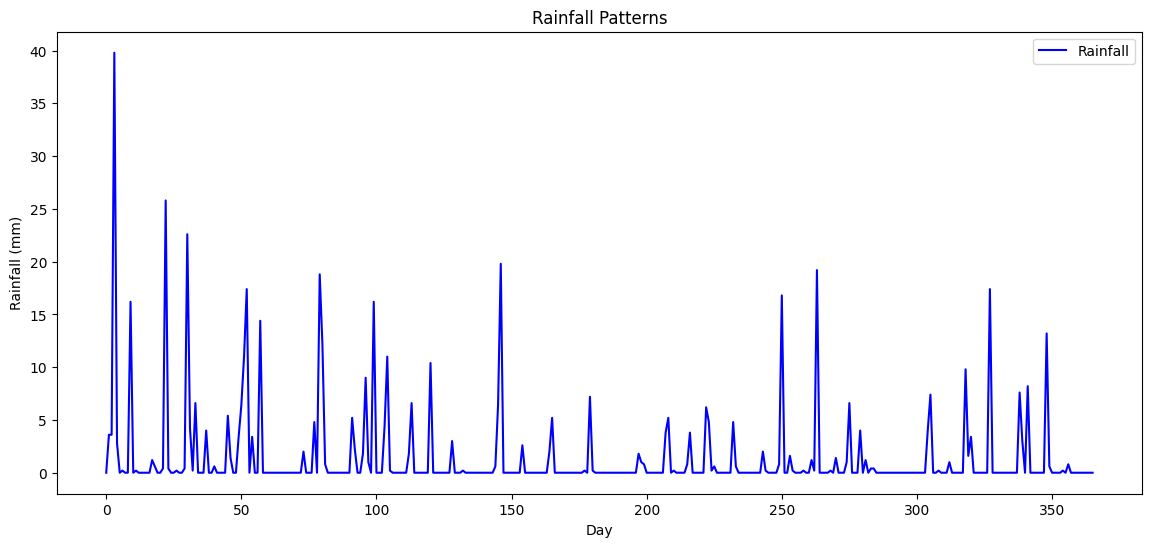

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(weather_data['Rainfall'], label='Rainfall', color='blue')
plt.xlabel('Day')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Patterns')
plt.legend()
plt.show()

### Wind and humidity distributions

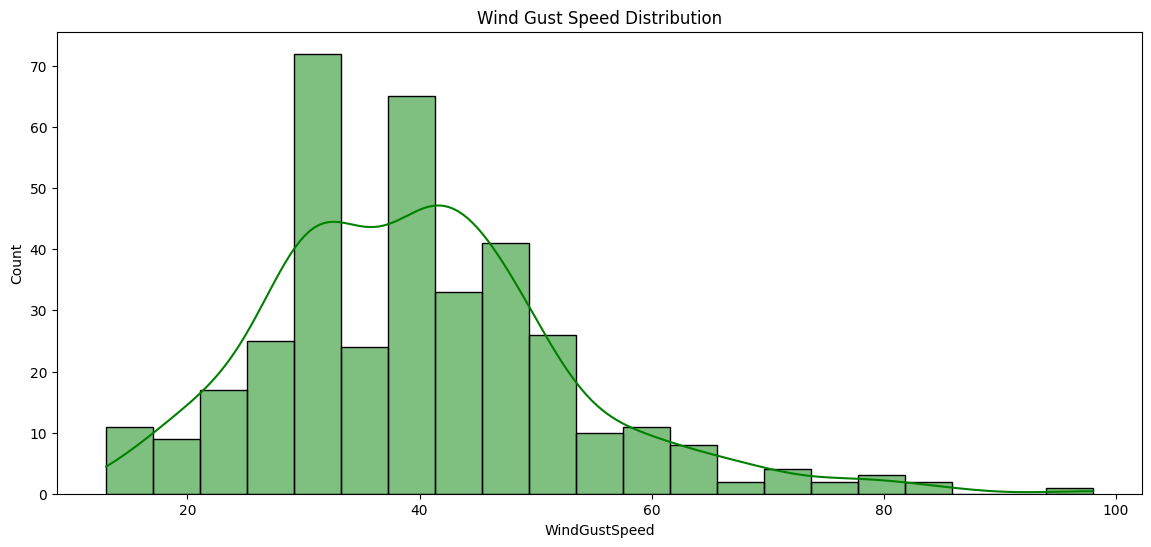

In [17]:
plt.figure(figsize=(14, 6))
sns.histplot(weather_data['WindGustSpeed'], kde=True, color='green')
plt.title('Wind Gust Speed Distribution')
plt.show()

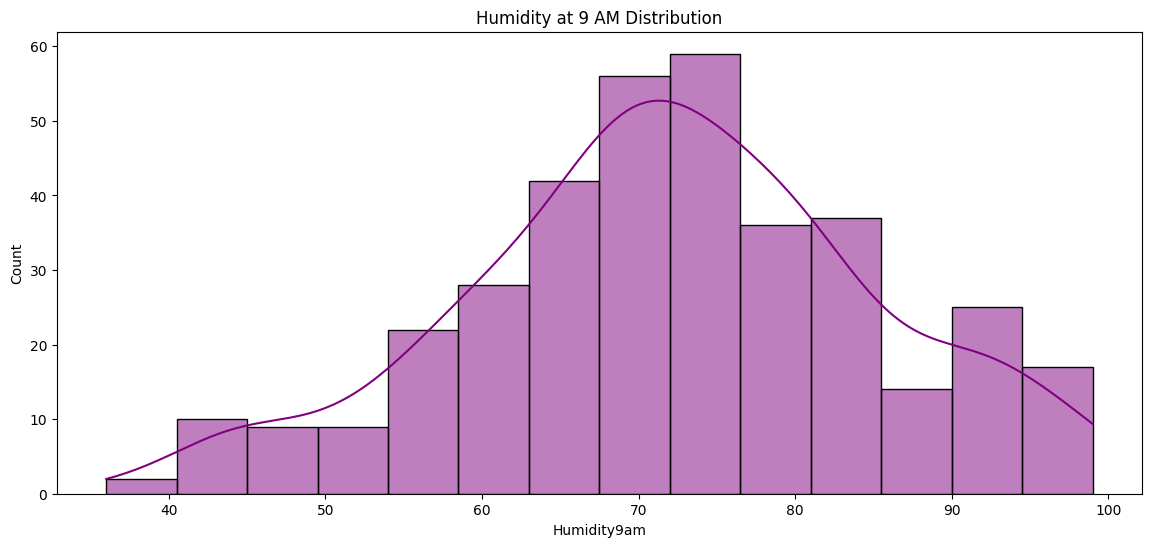

In [18]:
plt.figure(figsize=(14, 6))
sns.histplot(weather_data['Humidity9am'], kde=True, color='purple')
plt.title('Humidity at 9 AM Distribution')
plt.show()

### Correlation Matrix

In [19]:
# Correlation matrix
# Selecting only numeric columns for correlation matrix
numeric_cols = weather_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = weather_data[numeric_cols].corr()

In [20]:
correlation_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035001,0.217627,0.128358,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.450576,0.109702,-0.214689,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.148151,0.096279,0.219487,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.316325,0.288053,0.069779,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035001,0.450576,-0.148151,0.316325,1.000000,0.094814,-0.062715,0.072608,-0.497699,-0.754564,0.007801,-0.034299,-0.677401,-0.658812,0.218991,0.468927,-0.377695
WindGustSpeed,0.217627,0.109702,0.096279,0.288053,0.094814,1.000000,0.520873,0.693613,-0.349536,-0.069493,-0.537508,-0.524754,-0.012421,0.050452,0.255725,0.072609,0.252028
WindSpeed9am,0.128358,-0.214689,0.219487,0.069779,-0.062715,0.520873,1.000000,0.467935,-0.270929,0.145636,-0.352542,-0.244315,0.104044,-0.025339,0.065398,-0.233374,0.040489
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072608,0.693613,0.467935,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.497699,-0.349536,-0.270929,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.754564,-0.069493,0.145636,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


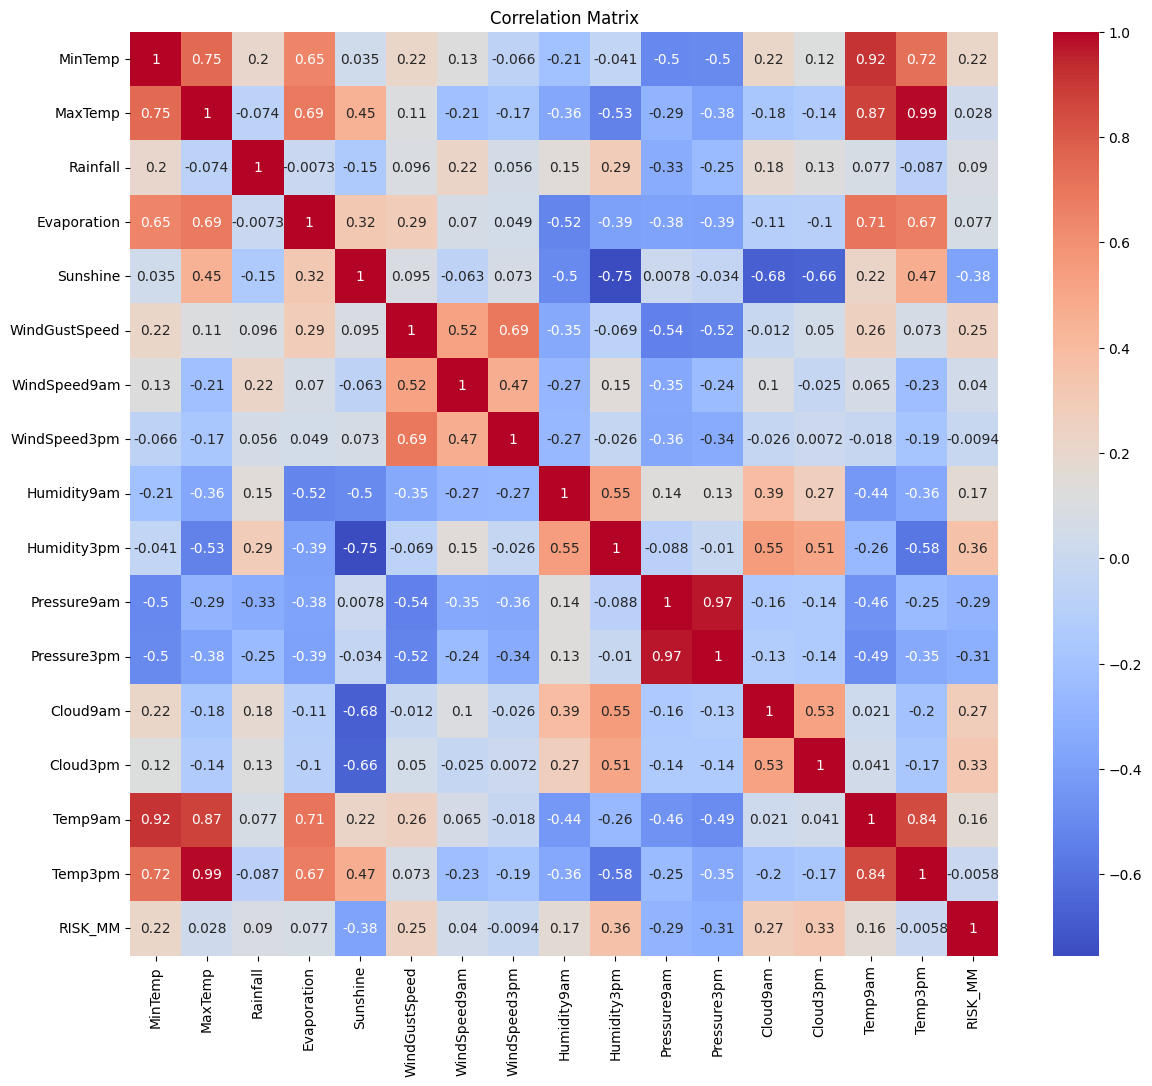

In [21]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Here are some potential insights that can be drawn from the exploratory data analysis (EDA) based on the provided weather dataset and visualizations:

1. **Temperature Trends:**
   - By plotting the minimum and maximum temperatures over time, we can observe seasonal patterns and trends. For example, there may be noticeable fluctuations between summer and winter months, with higher temperatures in the summer and lower in the winter.
   - Identifying any significant temperature changes or anomalies on specific days, which could correlate with other weather events like storms or heatwaves.

2. **Rainfall Patterns:**
   - The rainfall plot shows the distribution and frequency of rainy days. By examining this, we can identify periods with heavy rainfall and dry spells.
   - Observing trends such as rainy seasons or particular months with unusually high or low rainfall.

3. **Wind Gust Speed Distribution:**
   - The distribution of wind gust speeds provides insights into the typical wind conditions in the area. Peaks in the histogram can indicate common wind speeds.
   - Identifying days with extreme wind speeds, which might be associated with storms or other significant weather events.

4. **Humidity Distribution:**
   - The distribution of humidity levels at 9 AM shows the typical humidity range. Peaks in the histogram can indicate common humidity levels.
   - Identifying periods with unusually high or low humidity, which could affect comfort levels and weather conditions.

5. **Correlation Matrix:**
   - The correlation matrix helps in understanding the relationships between different weather parameters. For example:
     - A high positive correlation between `MinTemp` and `MaxTemp` indicates that days with high minimum temperatures also tend to have high maximum temperatures.
     - A negative correlation between `Pressure9am` and `Rainfall` might suggest that lower pressure tends to be associated with higher rainfall.
     - Other significant correlations can reveal dependencies, such as between humidity and temperature, or wind speed and pressure.

6. **Overall Weather Patterns:**
   - By combining insights from temperature, rainfall, wind, and humidity, we can get a comprehensive view of the typical weather patterns.
   - Seasonal variations can be better understood by observing changes in temperature, rainfall, and other parameters over time.

These insights can help in various applications, such as:
- Weather forecasting and prediction.
- Planning for agricultural activities based on rainfall and temperature trends.
- Preparing for extreme weather events by understanding historical patterns.
- Enhancing climate research and studies by providing a detailed analysis of weather parameters.

# Model creation and Prediction

In [22]:
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [23]:
weather_data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

**Creating a new feature for temperature difference**

In [24]:
weather_data['TempDiff']=weather_data['MaxTemp']-weather_data['MinTemp']

In [26]:
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,TempDiff
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,16.3
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,12.9
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,9.7
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,2.2
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,8.5


### Preparing data for training and prediction

In [27]:
df=weather_data
X = df[['MinTemp', 'MaxTemp', 'TempDiff']]
y = df['Rainfall']

### Splitting the data into training and testing sets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating and training a linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Making predictions

In [33]:
y_pred=model.predict(X_test)

In [34]:
y_pred

array([ 2.29708344e+00,  1.68010076e+00, -6.94848032e-02,  2.08559345e+00,
        1.80290140e+00,  3.96566267e-01,  1.44851092e+00,  4.56144725e+00,
       -3.13056623e-01,  1.72403131e-01,  2.04681880e+00,  2.64633554e+00,
        1.70175505e+00,  5.84243072e-01,  1.94424359e-01,  3.50364917e-01,
        5.13386593e-01,  2.65721673e+00,  1.80229696e+00,  1.18578928e+00,
        1.03414516e+00,  1.36256355e+00,  1.78303906e+00,  2.97043615e+00,
        3.68197789e-01,  9.17235571e-02,  1.84525997e+00, -9.39387393e-01,
        1.89869068e-01, -8.46617759e-01,  2.33048222e+00,  1.90989863e+00,
        2.07697923e+00, -4.79057778e-01, -5.79124678e-01,  1.84694385e+00,
        3.33788806e+00,  3.59389551e+00, -3.80437258e-01,  2.61222425e+00,
        3.65326383e-01, -5.30526931e-01,  3.85469577e+00,  2.17870612e-01,
        1.04204686e+00,  1.94232603e+00,  1.03977989e+00,  1.95609998e+00,
        1.84502247e+00,  3.80406856e+00,  7.22113254e-01, -4.26306080e-03,
        1.07937513e+00,  

### Calculating Mean Squared Error

In [35]:
from sklearn.metrics import mean_squared_error

In [39]:
mse=mean_squared_error(y_test,y_pred)
mse

37.076845600582615